In [ ]:
## Rotating around the Bloch sphere
Single-qubit gates may be visualized as rotations around the Bloch sphere. For example, recall that applying an _X_ gate results in a $\pi$ rotation around the X axis. Take a few minutes to read the [Single-Qubit Gates](https://qiskit.org/documentation/terra/summary_of_quantum_operations.html#single-qubit-gates) section of the Qiskit Terra documentation, focusing on the _X_, _Y_, _Z_, _S_, _T_, _Rx_, _Ry_ and _Rz_ gates. As you're reading about the behavior of each gate and the [unitary matrices](https://en.wikipedia.org/wiki/Unitary_matrix) that model them, use the [Bloch sphere playground application](https://javafxpert.github.io/grok-bloch/) to visualize their rotations and effect on the qubit's state. Some gates, including _Z_, _Rz_, _S_, and _T_ rotate exclusively around the Z axis, therefore affecting the qubit's phase but not its amplitudes or measurement probabilities. Other gates, including _X_, _Rx_, _Y_ and _Ry_ affect its amplitudes, and consequently its measurement probabilities.

Suppose we wanted a qubit to evolve from state $\vert0\rangle$ to a state whose probability of measuring $\vert1\rangle$ is approximately 0.85 and whose phase is $\pi$. One approach would be to use the _Bloch sphere playground application_ to try rotations that achieve that state. Doing so shows that applying an _Ry_ gate with a rotation angle ($\theta$) of $-3\pi/4$ will do the trick. The following code leverages this gate and angle to produce the desired state.

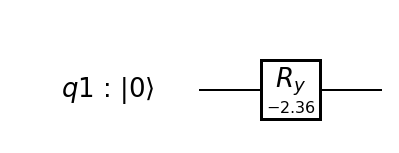

In [2]:
# Do the usual setup, but without classical registers or measurement
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, execute

qr = QuantumRegister(1)
circ = QuantumCircuit(qr)

# Place an Ry gate with a −3π/4 rotation
circ.ry(-3/4 * np.pi, qr[0])

# Draw the circuit
circ.draw(output='mpl')


We'll use the statevector simulator to verify that we've achieved the desired state

In [0]:
# Use the BasicAer statevector_simulator backend
from qiskit import BasicAer
backend_sv_sim = BasicAer.get_backend('statevector_simulator')

job_sim = execute(circ, backend_sv_sim)
result_sim = job_sim.result()
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector
quantum_state

Notice that the desired probabilities have been achieved, as squaring the absolute values of the $\vert1\rangle$ amplitude $-0.924i$ results in approximately 0.85. Let's visualize this state on the Bloch sphere.

In [0]:
# Plot the state vector on a Bloch sphere
from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(quantum_state)

#### Now it's your turn to play!
Here's a challenge for you: In the following cells, modify the circuit to achieve a qubit state whose probability of measuring $\vert0\rangle$ is 0.75, and phase is $\pi/4$ 


In [0]:
# Do the usual setup, but without classical registers or measurement
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, execute

qr = QuantumRegister(1)
circ = QuantumCircuit(qr)

# Place gates that will achieve the desired state


# Draw the circuit
circ.draw(output='mpl')


In [0]:
# Use the BasicAer statevector_simulator backend
from qiskit import BasicAer
backend_sv_sim = BasicAer.get_backend('statevector_simulator')

job_sim = execute(circ, backend_sv_sim)
result_sim = job_sim.result()
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector
quantum_state

In [0]:
# Plot the state vector on a Bloch sphere
from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(quantum_state)

#### One more challenge before you go

Recall that the Hadamard gate rotates the state on the Bloch sphere $\pi$ radians around the diagonal X+Z axis. Because of this behavior, inserting a phase rotation gate between two Hadamard gates has the effect of converting the Z rotation into an X rotation. This is used by some quantum computing algorithms to exchange phase amplitudes with probability amplitudes while in a superposition. Your challenge is to create a circuit (in the cells above) that contains two Hadamard gates with a phase rotation gate in-between them. The probability of measuring $\vert0\rangle$ must be approximately 0.85.

Enjoy this challenge, and congratulations on the progress you've made on your quantum computing journey!